In [ ]:
# summary
# web : server-client
# request,response : get, post
# 페이지 종류
# - 동적 페이지 : URL 변화 없이 페이지 데이터 변경 : JSON > API
# - 정적 페이지 : URL 변화 해서 페이지 데이터 변경 : HTML

# 동적 페이지 데이터 수집 프로세스
# 1. 웹서비스 분석(개발자도구) : URL
# 2. request(url,params,headers) > response(json) : JSON(str)
# 3. JSON(str) > list,dict > DataFrame

# API를 이용한 데이터 수집
# 1. APP 등록 : application key
# 2. api 문서 확인
# 3. request(url,params,headers(application key)) > response(json) : JSON(str)
# 4. JSON(str) > list,dict > DataFrame or Text

### 크롤링 정책
- robots.txt 파일에 크롤링 정책 설명 : ex) https://www.ted.com/robots.txt
- 크롤링에 대한 법적 제제 X
- 과도한 크롤링으로 서비스에 영향을 주었을때 문제가 될 수 있음
    - 영업방해, 지적재산권 침해
- 크롤링을 할때는 되도록 API를 사용
- 사례 : 잡코리아, 사람인 : 2008 ~ 2018 소송 끝 승리

### 네이버 검색어 트랜드 수집

In [1]:
import requests, json
import pandas as pd

In [2]:
# 1. application key

In [7]:
CLIENT_ID, CLIENT_SECRET = "비","밀"

In [3]:
# 2. document : url,params, headers

In [9]:
url = 'https://openapi.naver.com/v1/datalab/search'

In [21]:
params = {
    "startDate": "2018-01-01",
    'endDate' : "2022-07-31",
    "timeunit" : 'month',
    "keywordGroups" : [
        {"groupName": "트위터", "keywords": ["트위터","트윗"]},
        {"groupName": "페이스북", "keywords": ["페이스북","페북"]},
        {"groupName": "인스타그램", "keywords": ["인스타그램","인스타"]},
    ]
}

In [23]:
params = {
    "startDate": "2018-01-01",
    "endDate": "2022-07-31",
    "timeUnit": "month",
    "keywordGroups": [ {"groupName": "트위터", "keywords": ["트위터", "트윗"]}, {"groupName": "페이스북", "keywords": ["페이스북", "페북"]}, {"groupName": "인스타그램", "keywords": ["인스타그램", "인스타"]}, ] }

In [11]:
headers = {
    "Content-Type":"application/json",
    "X-Naver-Client-Id": CLIENT_ID,
    "X-Naver-Client-Secret": CLIENT_SECRET,
}

In [4]:
# 3. request(url,params,headers) > response(json) : JSON(str)

In [ ]:
# json.dumps 한글을 영어 특수문자로 바꾸어 표시

In [24]:
response = requests.post(url, json.dumps(params),headers=headers)
response

<Response [200]>

In [25]:
response.text[:300]

'{"startDate":"2018-01-01","endDate":"2022-07-31","timeUnit":"month","results":[{"title":"트위터","keywords":["트위터","트윗"],"data":[{"period":"2018-01-01","ratio":14.59502},{"period":"2018-02-01","ratio":13.0238},{"period":"2018-03-01","ratio":12.97953},{"period":"2018-04-01","ratio":12.82991},{"period":"'

In [5]:
# 4. JSON(str) > preprocessing(전처리) > DataFrame

In [40]:
data = response.json()['results']
df = pd.DataFrame({
    "date" : [period["period"] for period in data[0]["data"]],
    "twitter" : [ratio["ratio"] for ratio in data[0]["data"]],
    "facebook" : [ratio["ratio"] for ratio in data[1]["data"]],
    "instagram" : [ratio["ratio"] for ratio in data[2]["data"]],
})
df.tail(2)

,date,twitter,facebook,instagram
53,2022-06-01,23.24110,20.04381,21.63141
54,2022-07-01,24.06197,19.53712,21.40551


In [32]:
# list comprehension : 간단한 for,if문을 사용하여 리스트 데이터를 만들때 사용하는 방법
# 0 ~ 9 까지 홀수만 제곱해서 리스트를 출력
result = []
for num in range(10):
#     print(num)
    if num % 2:
        result.append(num**2)
result

[1, 9, 25, 49, 81]

In [33]:
result = [num**2 for num in range(10) if num % 2]
result

[1, 9, 25, 49, 81]

In [6]:
# 5. visualization

<AxesSubplot:>

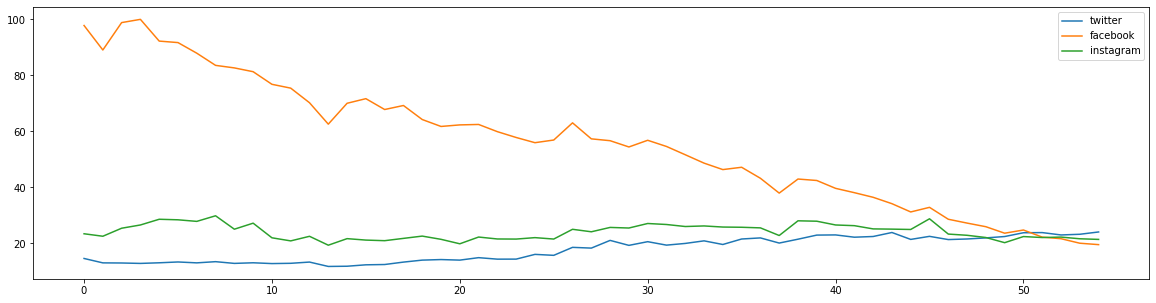

In [41]:
df.plot(figsize=(20,5))

# 과제 : 카카오 API 사용해서 주소를 입력하면 주소 > 위도,경도,우편번호 또는 반대(위도,경도,우편번호 > 주소) API 사용

In [ ]:
# - RESP API 키 사용
# - 문서 > 로컬 > 개발가이드 : https://developers.kakao.com/docs/latest/ko/local/dev-guide

In [ ]:
# HACKERTYPER(자랑하고 싶을 때 링크)

In [ ]:
# 판다스 정보 : https://pandas.pydata.org/docs/user_guide/10min.html